Using agents column: Have you ever written an `agents.md`, modified your `.claude` directory, or added context specifically for agents in other way?
Using helpfulness column: On a scale of 1 to 5, how would you rate the overall helpfulness of AI in your daily development tasks?


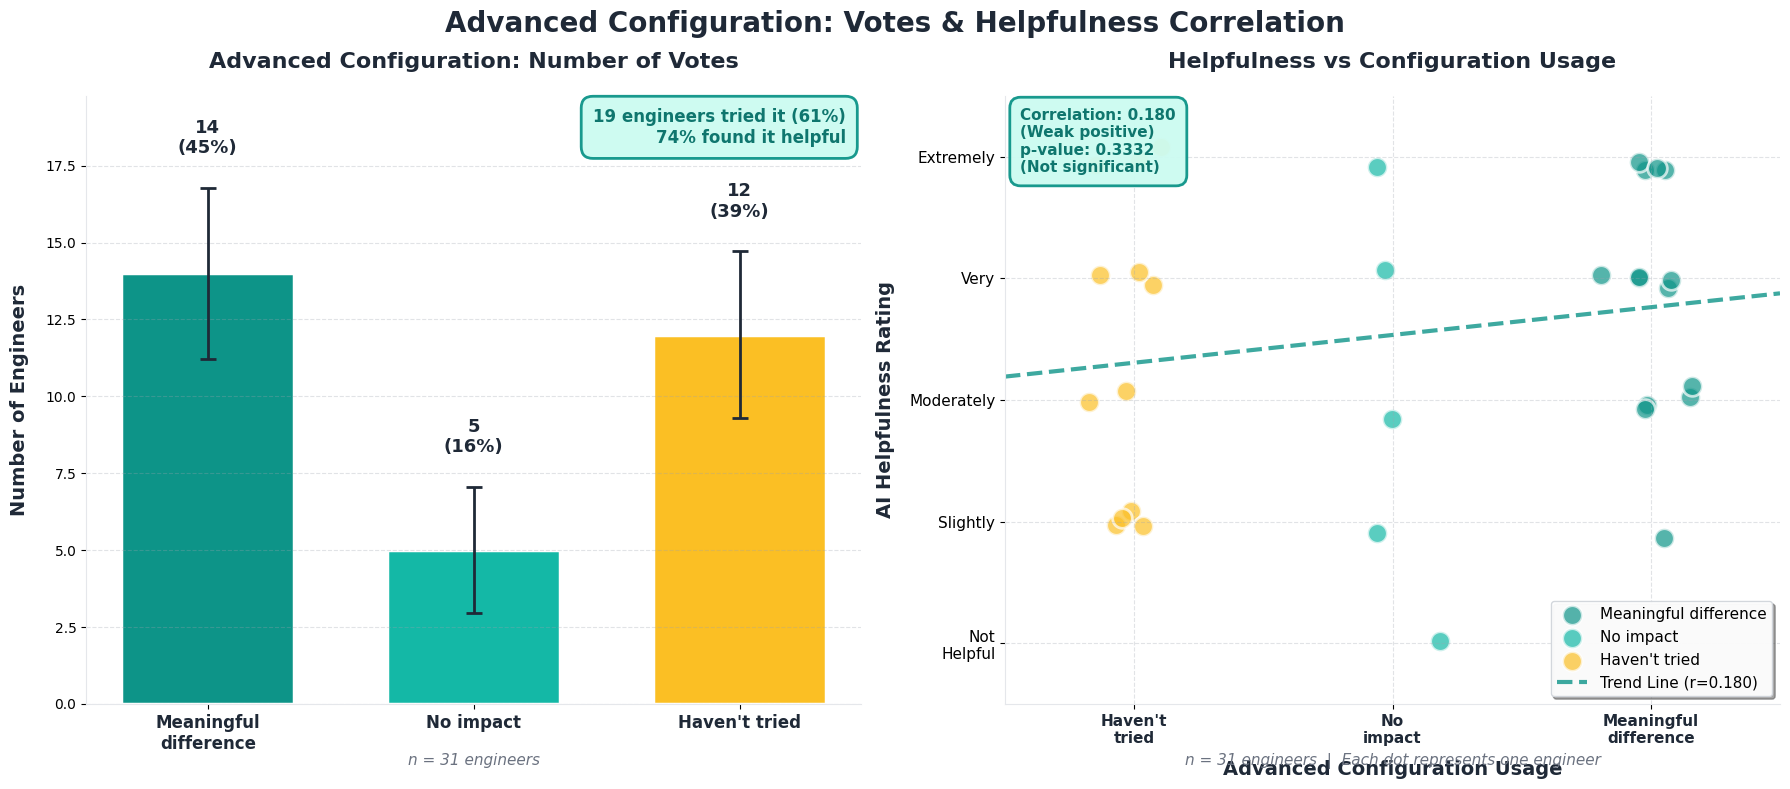


ADVANCED CONFIGURATION: ADOPTION & CORRELATION ANALYSIS

📊 Sample Size: 31 engineers

📈 Response Distribution (Number of Votes):
   • Yes -- and it made a meaningful difference
     Count: 14 (45.2%)
   • Yes -- but I didn't notice much impact
     Count: 5 (16.1%)
   • No -- I know it's possible but haven't taken the time
     Count: 12 (38.7%)

⭐ Satisfaction by Configuration Status:
   • Yes -- and it made a meaningful difference
     Average Helpfulness: 3.86/5.0 (n=14)
   • Yes -- but I didn't notice much impact
     Average Helpfulness: 3.00/5.0 (n=5)
   • No -- I know it's possible but haven't taken the time
     Average Helpfulness: 3.42/5.0 (n=12)

✨ Key Finding:
   • Engineers who tried advanced config: 3.63/5.0 (n=19)
   • Engineers who haven't tried: 3.42/5.0 (n=12)
   • Difference: 0.21 points (6% higher)

   • Those who found it made a meaningful difference: 3.86/5.0 (n=14)
   • That's 0.44 points higher than those who haven't tried

💡 The Opportunity:
   • 12 engineers 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load the data
df = pd.read_csv('../responses.csv')

# Filter out non-engineering teams
teams_to_exclude = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[~df['Which team are you a part of?'].isin(teams_to_exclude)].copy()

# Get column names
agents_col = df_filtered.columns[16]  # Column Q - agents.md/.claude usage
helpfulness_col = df_filtered.columns[15]  # Column P - Helpfulness rating

print(f"Using agents column: {agents_col}")
print(f"Using helpfulness column: {helpfulness_col}")

# Create numeric mappings
rating_values = {
    'Extremely Helpful': 5,
    'Very Helpful': 4,
    'Moderately Helpful': 3,
    'Slightly Helpful': 2,
    'Not Helpful': 1
}

agents_numeric = {
    'Yes -- and it made a meaningful difference': 4,
    'Yes -- but I didn\'t notice much impact': 3,
    'No -- I know it\'s possible but haven\'t taken the time': 2,
    'No -- I wasn\'t aware that was possible': 1
}

df_filtered['rating_numeric'] = df_filtered[helpfulness_col].map(rating_values)
df_filtered['agents_numeric'] = df_filtered[agents_col].map(agents_numeric)

# Remove any NaN values
df_clean = df_filtered.dropna(subset=['agents_numeric', 'rating_numeric'])

# Filter out "Not aware" category (as requested in previous edits)
not_aware_category = 'No -- I wasn\'t aware that was possible'
df_clean = df_clean[df_clean[agents_col] != not_aware_category].copy()

# Define order (excluding "Not aware")
agents_order = [
    'Yes -- and it made a meaningful difference',
    'Yes -- but I didn\'t notice much impact',
    'No -- I know it\'s possible but haven\'t taken the time'
]

# Count responses for each category
agents_counts_series = df_clean[agents_col].value_counts().reindex(agents_order, fill_value=0)

# Convert to DataFrame for easier handling
agents_counts = pd.DataFrame({
    'Count': agents_counts_series.values,
    'Percentage': (agents_counts_series.values / len(df_clean) * 100),
    'SEM': np.sqrt((agents_counts_series.values / len(df_clean)) * (1 - agents_counts_series.values / len(df_clean)) / len(df_clean))
})
agents_counts['SEM_Count'] = agents_counts['SEM'] * len(df_clean)
agents_counts.index = agents_order

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# ===== LEFT: Bar Chart of Response Counts =====
# Modern teal/blue/green gradient colors
colors = ['#0D9488', '#14B8A6', '#FBBF24']

# Shortened labels for bar chart
labels_short = [
    'Meaningful\ndifference',
    'No impact',
    'Haven\'t tried'
]

# Get counts in order for plotting
counts_ordered = [agents_counts.loc[cat, 'Count'] for cat in agents_order]
pcts_ordered = [agents_counts.loc[cat, 'Percentage'] for cat in agents_order]
sem_counts_ordered = [agents_counts.loc[cat, 'SEM_Count'] for cat in agents_order]

# Calculate max with error for ylim
max_with_error = max([c + s for c, s in zip(counts_ordered, sem_counts_ordered)]) if len(counts_ordered) > 0 else 0

bars = ax1.bar(range(len(agents_order)), counts_ordered, 
               color=colors, edgecolor='white', linewidth=2.5, width=0.65,
               yerr=sem_counts_ordered, error_kw={'elinewidth': 2, 'ecolor': '#1F2937', 
               'capsize': 6, 'capthick': 2})

# Add count labels on bars
for bar, count, pct, sem_count in zip(bars, counts_ordered, pcts_ordered, sem_counts_ordered):
    height = bar.get_height()
    label_y = height + sem_count + 1
    ax1.text(bar.get_x() + bar.get_width()/2, label_y,
            f'{int(count)}\n({pct:.0f}%)',
            ha='center', va='bottom', fontsize=13, weight='bold', color='#1F2937')

ax1.set_xticks(range(len(agents_order)))
ax1.set_xticklabels(labels_short, fontsize=12, weight='bold', color='#1F2937')
ax1.set_ylabel('Number of Engineers', fontsize=14, weight='bold', color='#1F2937', labelpad=12)
ax1.set_title('Advanced Configuration: Number of Votes', 
              fontsize=16, weight='bold', pad=20, color='#1F2937')
ax1.set_ylim(0, max(max(counts_ordered) + 4, max_with_error + 3))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#E5E7EB')
ax1.spines['bottom'].set_color('#E5E7EB')
ax1.grid(axis='y', alpha=0.3, linestyle='--', color='#9CA3AF')

# Add statistics box with modern teal theme
tried_count = agents_counts.loc[agents_order[0], 'Count'] + agents_counts.loc[agents_order[1], 'Count']
tried_pct = (tried_count / len(df_clean) * 100)
meaningful_pct = (agents_counts.loc[agents_order[0], 'Count'] / tried_count * 100) if tried_count > 0 else 0

stats_text = f"{int(tried_count)} engineers tried it ({tried_pct:.0f}%)\n{meaningful_pct:.0f}% found it helpful"
ax1.text(0.98, 0.98, stats_text,
         transform=ax1.transAxes, ha='right', va='top',
         fontsize=12, weight='bold',
         bbox=dict(boxstyle='round,pad=0.7', facecolor='#CCFBF1',
                  edgecolor='#0D9488', linewidth=2, alpha=0.95),
         color='#0F766E')

# Add subtitle
ax1.text(0.5, -0.1, f'n = {len(df_clean)} engineers', 
         ha='center', transform=ax1.transAxes, fontsize=11, style='italic', color='#6B7280')

# ===== RIGHT: Correlation Scatterplot =====
# Calculate correlation
if len(df_clean) > 1:
    correlation, correlation_pvalue = stats.pearsonr(df_clean['agents_numeric'], df_clean['rating_numeric'])
else:
    correlation, correlation_pvalue = 0, 1

# Define colors for each category (modern teal/green/yellow gradient)
category_colors = {
    'Yes -- and it made a meaningful difference': '#0D9488',
    'Yes -- but I didn\'t notice much impact': '#14B8A6',
    'No -- I know it\'s possible but haven\'t taken the time': '#FBBF24'
}

# Add jitter for better visibility
np.random.seed(42)  # For reproducible jitter
jitter_strength_x = 0.1
jitter_strength_y = 0.08

# Plot each category
for category in agents_order:
    category_data = df_clean[df_clean[agents_col] == category]
    if len(category_data) > 0:
        x_jittered = category_data['agents_numeric'] + np.random.normal(0, jitter_strength_x, len(category_data))
        y_jittered = category_data['rating_numeric'] + np.random.normal(0, jitter_strength_y, len(category_data))
        
        # Shortened label for legend
        if category == 'Yes -- and it made a meaningful difference':
            label = 'Meaningful difference'
        elif category == 'Yes -- but I didn\'t notice much impact':
            label = 'No impact'
        else:
            label = 'Haven\'t tried'
        
        ax2.scatter(x_jittered, y_jittered,
                   s=200, alpha=0.7,
                   color=category_colors[category],
                   edgecolors='white', linewidth=2,
                   label=label)

# Add trend line
if len(df_clean) > 1:
    z = np.polyfit(df_clean['agents_numeric'], df_clean['rating_numeric'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(1.5, 4.5, 100)
    ax2.plot(x_trend, p(x_trend), color='#0D9488', linestyle='--', 
            linewidth=3, alpha=0.8, label=f'Trend Line (r={correlation:.3f})')

# Customize scatterplot
ax2.set_xlabel('Advanced Configuration Usage', fontsize=14, weight='bold', color='#1F2937', labelpad=10)
ax2.set_ylabel('AI Helpfulness Rating', fontsize=14, weight='bold', color='#1F2937', labelpad=10)
ax2.set_title('Helpfulness vs Configuration Usage',
             fontsize=16, weight='bold', pad=20, color='#1F2937')

# Set axis labels (excluding "Not aware")
ax2.set_xticks([2, 3, 4])
ax2.set_xticklabels(['Haven\'t\ntried', 'No\nimpact', 'Meaningful\ndifference'],
                   fontsize=11, weight='bold', color='#1F2937')

ax2.set_yticks([1, 2, 3, 4, 5])
ax2.set_yticklabels(['Not\nHelpful', 'Slightly', 'Moderately', 'Very', 'Extremely'],
                   fontsize=11)

ax2.set_xlim(1.5, 4.5)
ax2.set_ylim(0.5, 5.5)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('#E5E7EB')
ax2.spines['bottom'].set_color('#E5E7EB')
ax2.grid(alpha=0.3, linestyle='--', color='#9CA3AF')
if len(df_clean) > 1:
    ax2.legend(loc='lower right', fontsize=11, framealpha=0.95, 
              edgecolor='#D1D5DB', fancybox=True, shadow=True)

# Add correlation info box
corr_strength = 'Strong' if abs(correlation) > 0.5 else 'Moderate' if abs(correlation) > 0.3 else 'Weak'
sig_text = 'Significant' if correlation_pvalue < 0.05 else 'Not significant'
corr_text = f"Correlation: {correlation:.3f}\n({corr_strength} {'positive' if correlation > 0 else 'negative'})\np-value: {correlation_pvalue:.4f}\n({sig_text})"

ax2.text(0.02, 0.98, corr_text, 
         transform=ax2.transAxes, ha='left', va='top',
         fontsize=11, weight='bold',
         bbox=dict(boxstyle='round,pad=0.7', facecolor='#CCFBF1', 
                  edgecolor='#0D9488', linewidth=2, alpha=0.95),
         color='#0F766E')

# Add subtitle
ax2.text(0.5, -0.1, f'n = {len(df_clean)} engineers  |  Each dot represents one engineer', 
         ha='center', transform=ax2.transAxes, fontsize=11, style='italic', color='#6B7280')

# Overall title
fig.suptitle('Advanced Configuration: Votes & Helpfulness Correlation', 
            fontsize=20, weight='bold', y=0.98, color='#1F2937')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\n" + "="*80)
print("ADVANCED CONFIGURATION: ADOPTION & CORRELATION ANALYSIS")
print("="*80)

print(f"\n📊 Sample Size: {len(df_clean)} engineers")

print(f"\n📈 Response Distribution (Number of Votes):")
for response in agents_order:
    if response in agents_counts.index:
        count = agents_counts.loc[response, 'Count']
        pct = agents_counts.loc[response, 'Percentage']
        print(f"   • {response}")
        print(f"     Count: {int(count)} ({pct:.1f}%)")

print(f"\n⭐ Satisfaction by Configuration Status:")
for response in agents_order:
    response_data = df_clean[df_clean[agents_col] == response]
    if len(response_data) > 0:
        avg_rating = response_data['rating_numeric'].mean()
        count = len(response_data)
        print(f"   • {response}")
        print(f"     Average Helpfulness: {avg_rating:.2f}/5.0 (n={count})")

# Calculate key insights
tried_users = df_clean[df_clean['agents_numeric'].isin([3, 4])]
not_tried_users = df_clean[df_clean['agents_numeric'] == 2]

if len(tried_users) > 0 and len(not_tried_users) > 0:
    tried_avg = tried_users['rating_numeric'].mean()
    not_tried_avg = not_tried_users['rating_numeric'].mean()
    difference = tried_avg - not_tried_avg
    
    print(f"\n✨ Key Finding:")
    print(f"   • Engineers who tried advanced config: {tried_avg:.2f}/5.0 (n={len(tried_users)})")
    print(f"   • Engineers who haven't tried: {not_tried_avg:.2f}/5.0 (n={len(not_tried_users)})")
    if not_tried_avg > 0:
        print(f"   • Difference: {difference:.2f} points ({difference/not_tried_avg*100:.0f}% higher)")
    
    meaningful_only = df_clean[df_clean[agents_col] == agents_order[0]]
    if len(meaningful_only) > 0:
        meaningful_avg = meaningful_only['rating_numeric'].mean()
        print(f"\n   • Those who found it made a meaningful difference: {meaningful_avg:.2f}/5.0 (n={len(meaningful_only)})")
        if not_tried_avg > 0:
            print(f"   • That's {meaningful_avg - not_tried_avg:.2f} points higher than those who haven't tried")

# Calculate the opportunity (only haven't tried now, since we filtered out "not aware")
havent_tried = agents_counts.loc[agents_order[2], 'Count'] if len(agents_counts) > 0 else 0
opportunity_pct = (havent_tried / len(df_clean) * 100)

print(f"\n💡 The Opportunity:")
print(f"   • {int(havent_tried)} engineers know but haven't tried")
print(f"   • Opportunity: {int(havent_tried)} engineers ({opportunity_pct:.0f}%)")
print(f"   • If they achieve similar gains, we could increase average satisfaction significantly")

# Correlation (already calculated above)
if len(df_clean) > 1:
    print(f"\n📊 Statistical Correlation:")
    print(f"   • Pearson correlation: {correlation:.3f}")
    print(f"   • P-value: {correlation_pvalue:.4f}")
    if correlation_pvalue < 0.05:
        print(f"   • This relationship IS statistically significant")
    else:
        print(f"   • This relationship is NOT statistically significant (may need larger sample)")

print("\n" + "="*80 + "\n")